In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('../results/outputs/handled_outliers.csv')

In [3]:
# 0: Good (0–50), 1: Moderate (51–100), 2: Unhealthy (101+)
def aqi_category(pm25):
    if pm25 <= 50:
        return 0  # Good
    elif pm25 <= 100:
        return 1  # Moderate
    else:
        return 2  # Unhealthy

df['AQI_Category'] = df['PM2.5'].apply(aqi_category)


In [4]:
print("Target value counts:\n", df['AQI_Category'].value_counts())

Target value counts:
 AQI_Category
0    12827
1     7572
2     5726
Name: count, dtype: int64


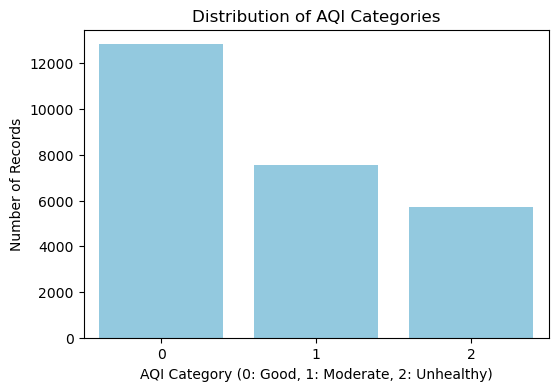

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='AQI_Category', data=df, color='skyblue')
plt.title("Distribution of AQI Categories")
plt.xlabel("AQI Category (0: Good, 1: Moderate, 2: Unhealthy)")
plt.ylabel("Number of Records")
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/aqi_category_distribution.png')
plt.show()

In [7]:
#save
os.makedirs('../results/outputs', exist_ok=True)
df.to_csv('../results/outputs/target_created.csv', index=False)